# 1. 数据理解和数据清洗

In [1]:
# Import the standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('superstore.csv')
data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [3]:
data.info(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

(None, (51290, 27))

In [5]:
data.describe().style.background_gradient(cmap='twilight')

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.000000,28.610982,3.476545,25645.500000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.000000,174.340972,2.278766,14806.291990,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.000000,-6599.978000,1.000000,1.000000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.000000,0.000000,2.000000,12823.250000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.000000,9.240000,3.000000,25645.500000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.000000,36.810000,5.000000,38467.750000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.000000,8399.976000,14.000000,51290.000000,22638.000000,933.570000,2014.000000,53.000000


In [6]:
# 删除 记录数列
try:
    data.drop(columns=["记录数"], inplace=True)
except:
    pass

data.isna().sum() # 发现没有任何缺失值
data.columns.values

array(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region',
       'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode',
       'Shipping.Cost', 'State', 'Sub.Category', 'Year', 'Market2',
       'weeknum'], dtype=object)

In [7]:
data.duplicated().sum() # 没有重复行   

np.int64(0)

## 字段理解


1. 地区和市场
    - state: The state or region within the country.
    - city: The city where the order was placed.
    - country: The country in which the superstore is located.
    - region: The region where the order was placed.
    - market: The market or region where the superstore operates.
    - market2: Another column related to market information.

2. 客户属性
    - customer_id: A unique identifier for each customer.
    - customer_name: The name of the customer who placed the order.
    - segment: The customer segment (e.g., consumer, corporate, or home office).

3. 订单属性
    - order_date: The date when the order was placed.
    - order_id: A unique identifier for each order.
    - order_priority: The priority level of the order.
    ---
    - ship_date: The date when the order was shipped.
    - ship_mode: The shipping mode used for the order.
    - shipping_cost: The cost of shipping for the order.
    ---
    - discount: The discount applied to the order.
    - profit: The profit generated from the order.
    - quantity: The quantity of products ordered.
    - sales: The total sales amount for the order.
    - year: The year in which the order was placed.
    - weeknum: The week number when the order was placed.
    ---
    - product_id: A unique identifier for each product.
    - product_name: The name of the product.
    - category: The category of products sold in the superstore.
    - sub_category: The sub-category of products within the main category.

00. UNKNOWN列
    - ji_lu_shu: An unknown or unspecified column.
    - row_id: A unique identifier for each row in the dataset.



In [8]:
# 将Order.Date和Ship.Date转换成时间列
data["Order.Date"] = pd.to_datetime(data["Order.Date"])
data["Ship.Date"] = pd.to_datetime(data["Ship.Date"])

In [9]:
# 区分numerical和categorical列
categorical_columns = [i for i in data if data[i].dtypes == "object"]
Numerical_columns = [i for i in data if data[i].dtypes == "int"]

## 整体分析

1. 得到对应城市、种类、地区、市场各自存在多少的订单

2. 得到收益前10的地区、城市、国家

3. 得到不同种类产品收益排名

4. 得到不同国家对应月份的时间趋势分析

5. 通过 RFM 分析给客户打上标签
   观察各个地区客户的占比

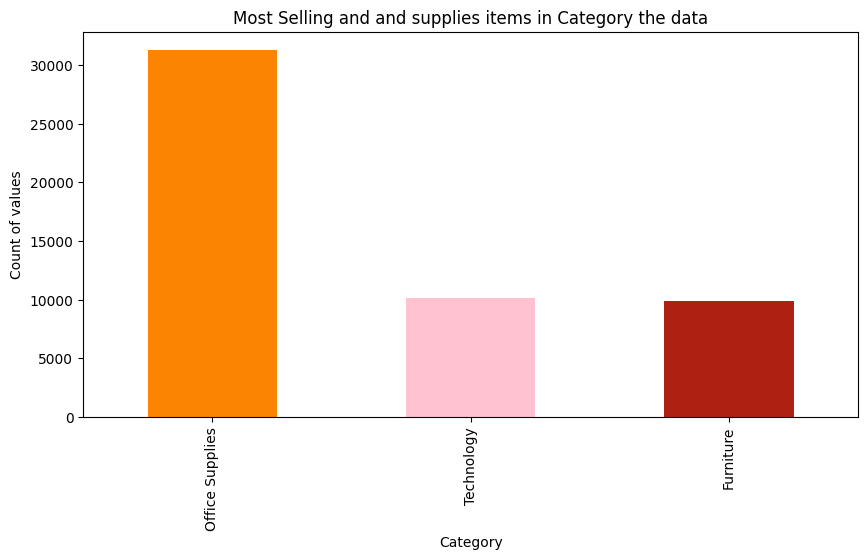

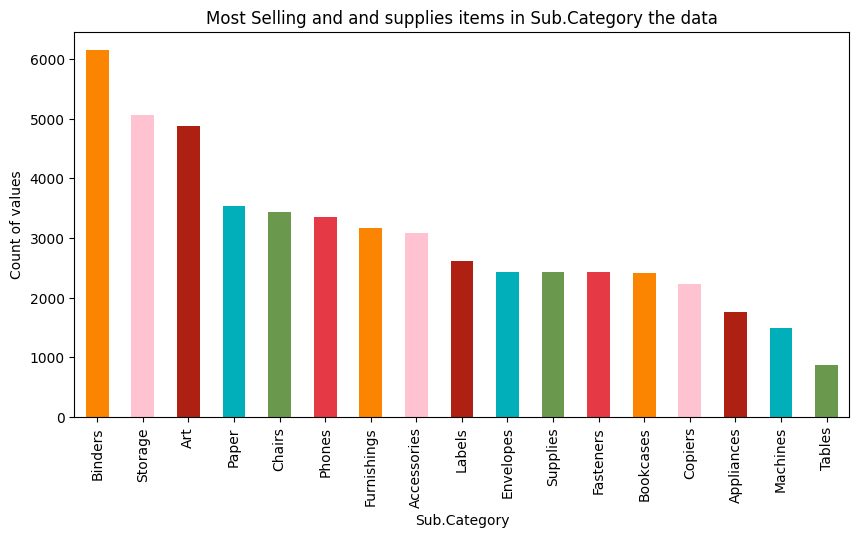

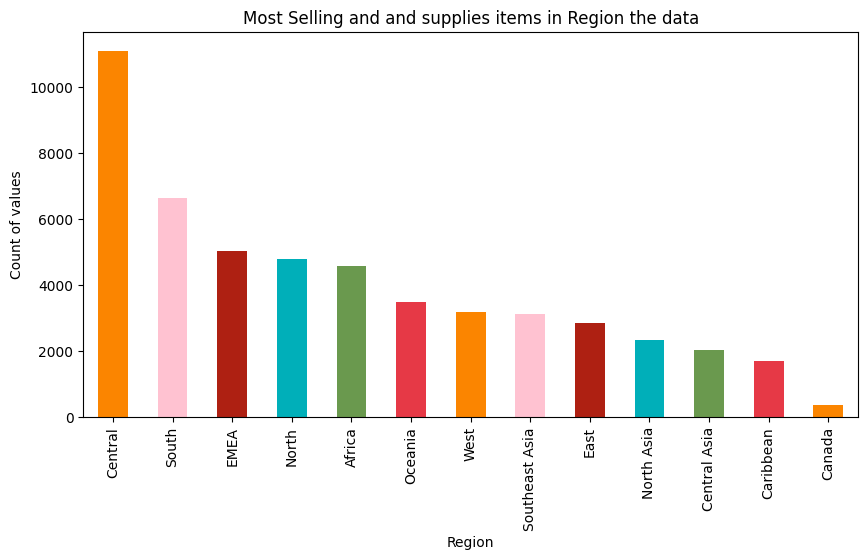

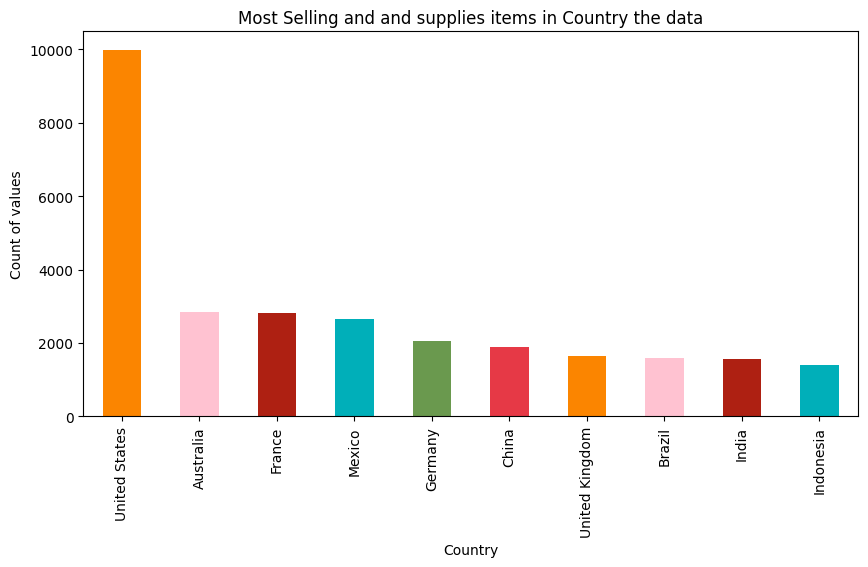

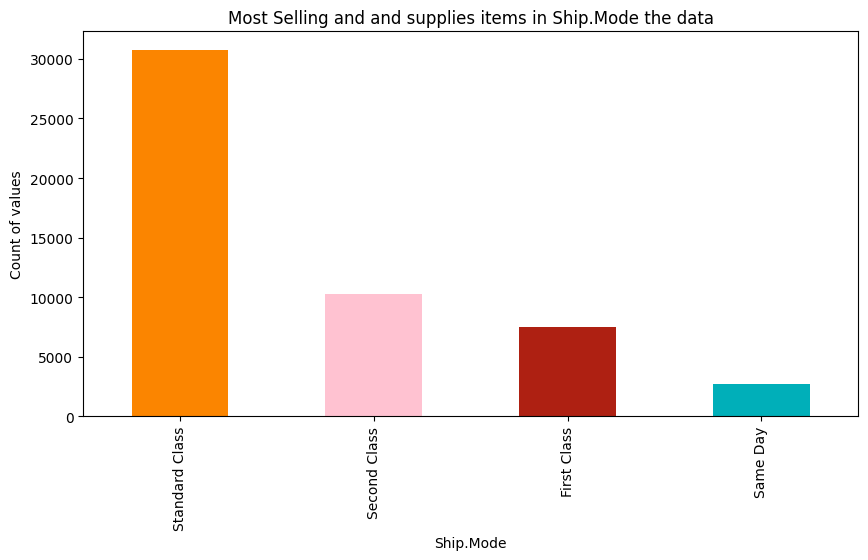

In [7]:
# 查看对应城市、种类、地区、市场的订单
colors = ["#fb8500", "#ffc2d1", "#ae2012", "#00afb9", "#6a994e", "#e63946"]
for i in [
    "Category",
    "Sub.Category",
    "Region",
    "Country",
    "Ship.Mode"
]:
    d = data[i].value_counts().sort_values(ascending=False)
    if i == "Country":
        d = d.iloc[:10]
    d.plot(
        kind="bar",
        figsize=(10, 5),
        color=colors,
        title=f"Most Selling and and supplies items in {i} the data",
    )
    plt.xlabel(i)
    plt.ylabel("Count of values")
    plt.xticks(rotation=90)
    plt.show()

# 分析


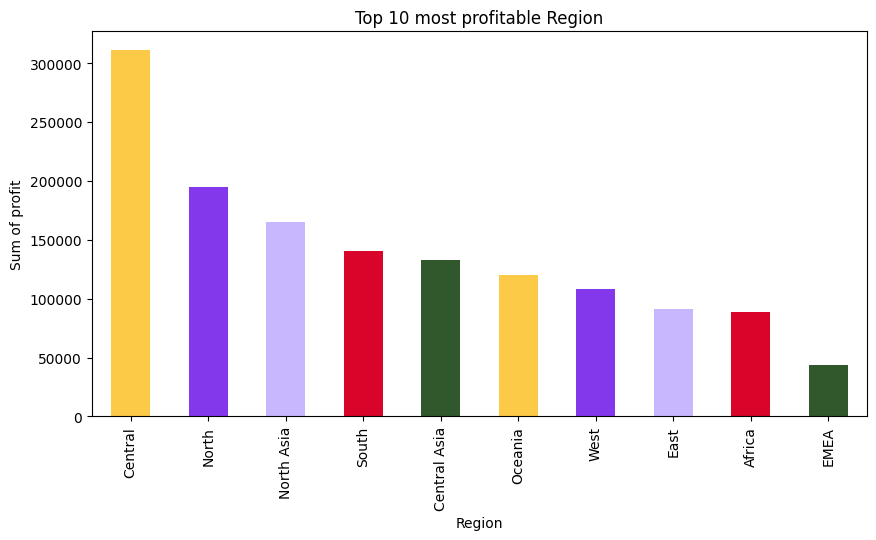

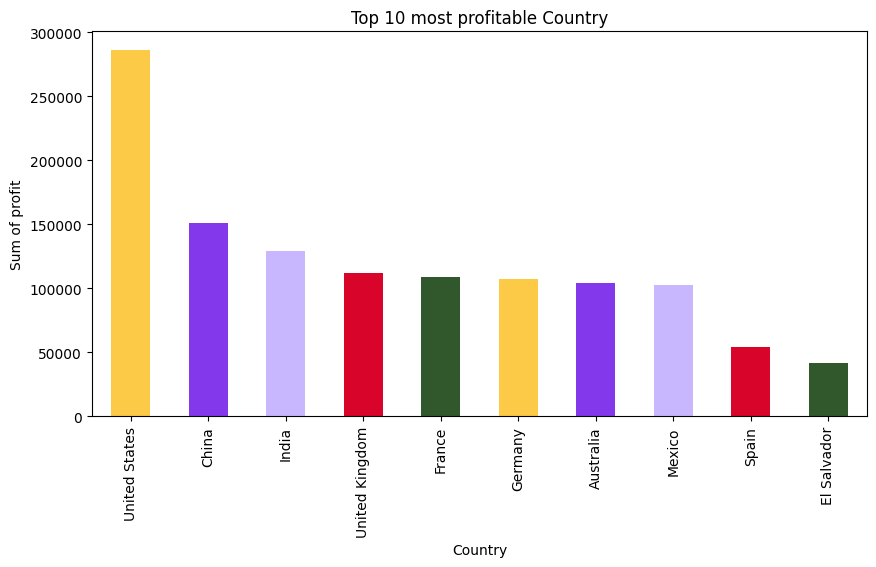

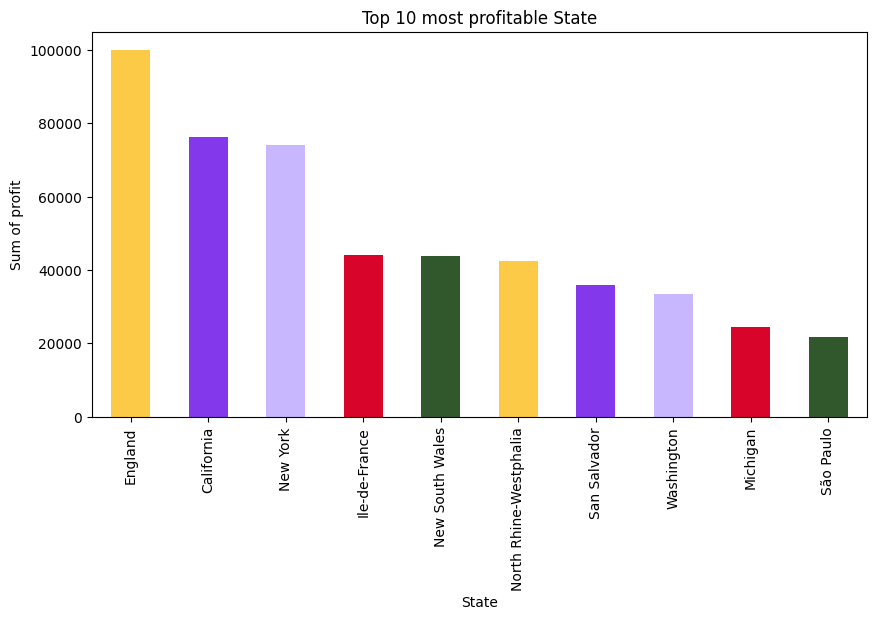

In [14]:
# 2. 得到收益前10的地区、城市、国家
# 主要考查profit
colors = ["#fcca46", "#8338ec", "#c8b6ff", "#d90429", "#31572c"]
data[["Region", "Country", "State", "Profit"]]
for i in ["Region", "Country", "State"]:
    data.groupby(i)["Profit"].sum().sort_values(ascending=False).head(
        10
    ).plot(
        kind="bar", figsize=(10, 5), title=f"Top 10 most profitable {i}", color=colors
    )
    plt.xlabel(i)
    plt.ylabel("Sum of profit")
    plt.xticks(rotation=90)
    plt.show()

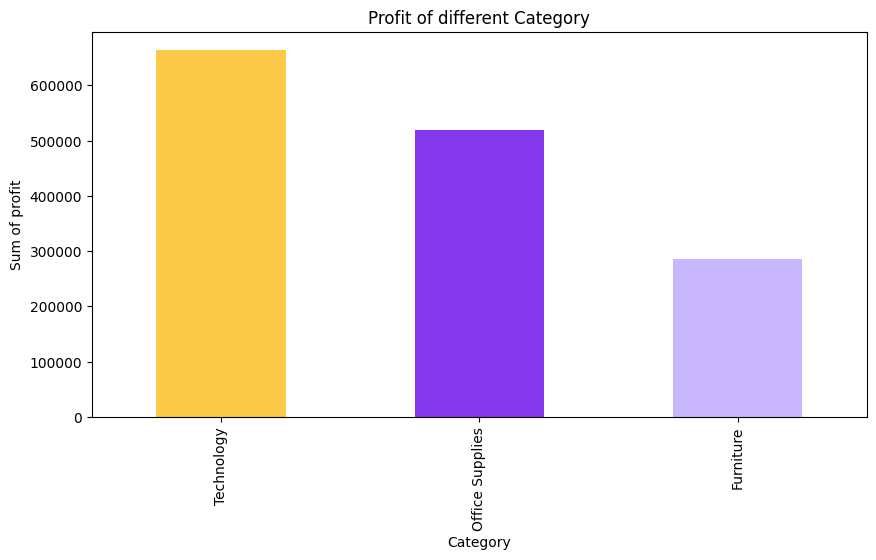

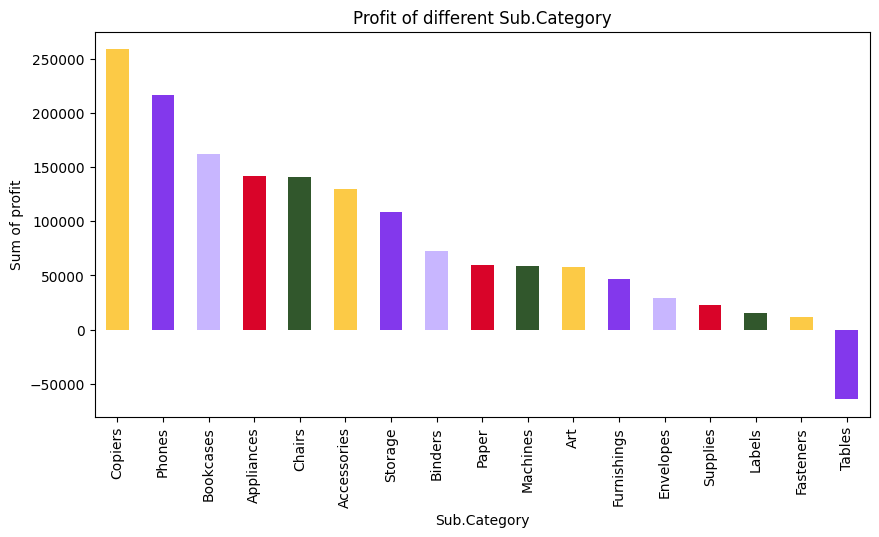

In [18]:
# 得到不同种类产品的收益排名
for i in ["Category", "Sub.Category"]:
    data.groupby(i)["Profit"].sum().sort_values(ascending=False).plot(
        kind="bar", figsize=(10, 5), title=f"Profit of different {i}", color=colors
    )
    plt.xlabel(i)
    plt.ylabel("Sum of profit")
    plt.xticks(rotation=90)
    plt.show()

In [35]:
from pyecharts.charts import Bar, Timeline, Line
import pyecharts.options as opts


tl = Timeline()

for i in range(2011, 2015):
    d = data[data["Year"] == i]

    # 得到月份总和
    sales = d.resample("M", on="Order.Date")["Sales"].sum()
    profit = d.resample("M", on="Order.Date")["Profit"].sum()

    # 创建line并添加到时间线中
    line = (
        Line()
        .add_xaxis(range(1, 13))
        .add_yaxis("sales", sales.values.tolist(), yaxis_index=0, is_smooth=True)
        .add_yaxis("profit", profit.values.tolist(), yaxis_index=1, is_smooth=True)
        .set_global_opts(title_opts=opts.TitleOpts(title="sales and profits timeline"))
    )
    tl.add(line, f"{i}年")

tl.render("timeline of sales&profit.html")

/tmp/ipykernel_385180/866143288.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales = d.resample("M", on="Order.Date")["Sales"].sum()
/tmp/ipykernel_385180/866143288.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  profit = d.resample("M", on="Order.Date")["Profit"].sum()


'/home/whonos/projs/datacomps/EMana/timeline of sales&profit.html'

# 市场分析

1. 

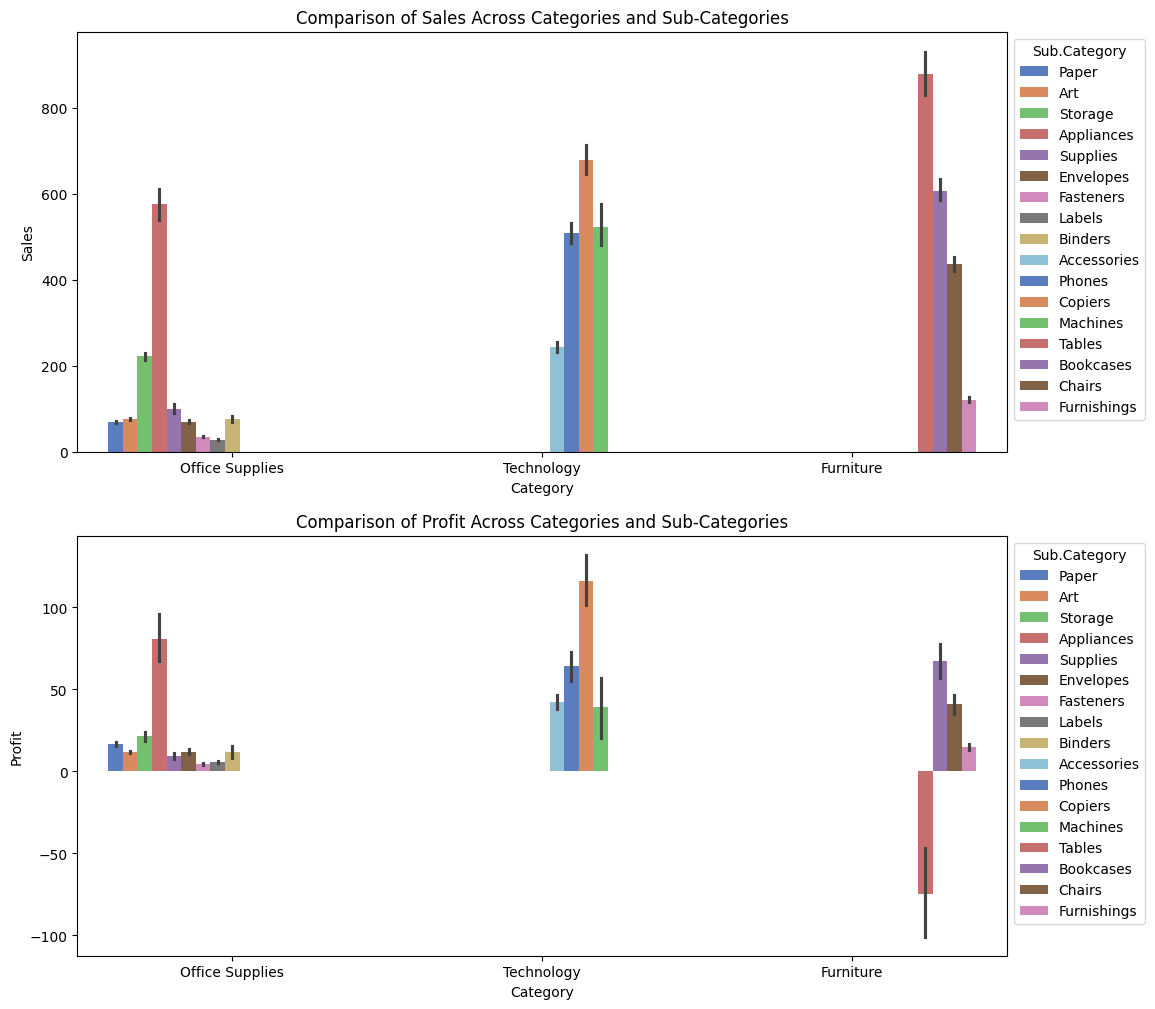

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [44]:
# Compare Sales across different categories using a bar plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Category",
    y="Sales",
    data=data,
    hue="Sub.Category",
    palette="muted",
    ax=axes[0],
)
axes[0].set_title("Comparison of Sales Across Categories and Sub-Categories")
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title="Sub.Category")


# Compare Profit across different categories using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Category", y="Profit", data=data, hue="Sub.Category", palette="muted", ax=axes[1]
)
axes[1].set_title("Comparison of Profit Across Categories and Sub-Categories")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title="Sub.Category")
plt.tight_layout()

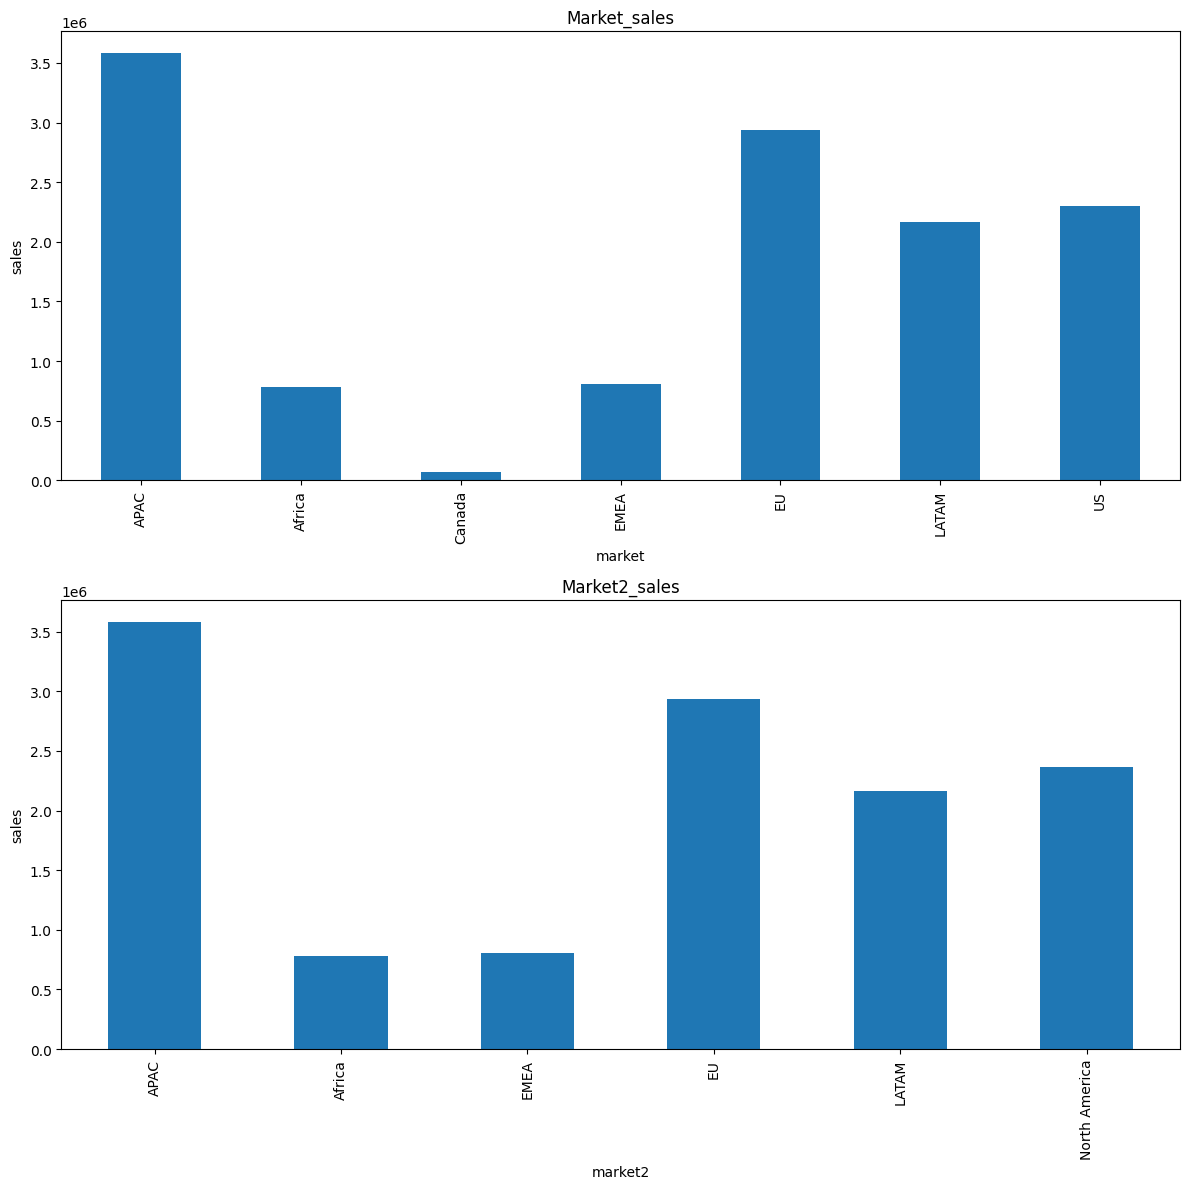

In [56]:
# 不同市场的消费和收益
fig, axes = plt.subplots(2, 1, figsize=(12, 12))


data.groupby("Market")["Sales"].sum().plot(
    kind="bar", xlabel="market", ylabel="sales", ax=axes[0], title="Market_sales"
)
data.groupby("Market2")["Sales"].sum().plot(
    kind="bar", xlabel="market2", ylabel="sales", ax=axes[1], title="Market2_sales"
)
plt.tight_layout()

<Axes: title={'center': 'Market2 Distribution'}, ylabel='count'>

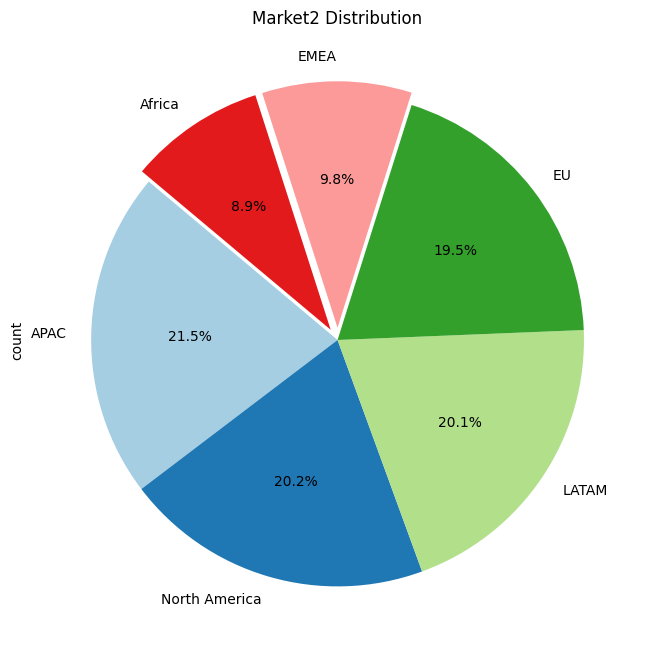

In [65]:
# 可以看出market和market2区别在多了一个canada市场他从north America分出了部分的订单
# data[data["Market"] == "Canada"]["Market2"].unique() ==
# array(['North America'], dtype=object)
market2_counts = data["Market2"].value_counts().sort_values(ascending=False)

# 定义配色方案
colors = plt.cm.Paired(range(len(market2_counts)))

# 绘制饼图
plt.figure(figsize=(8, 8))
market2_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    explode=[0] * 4 + [0.05, 0.05],
    title="Market2 Distribution",
)

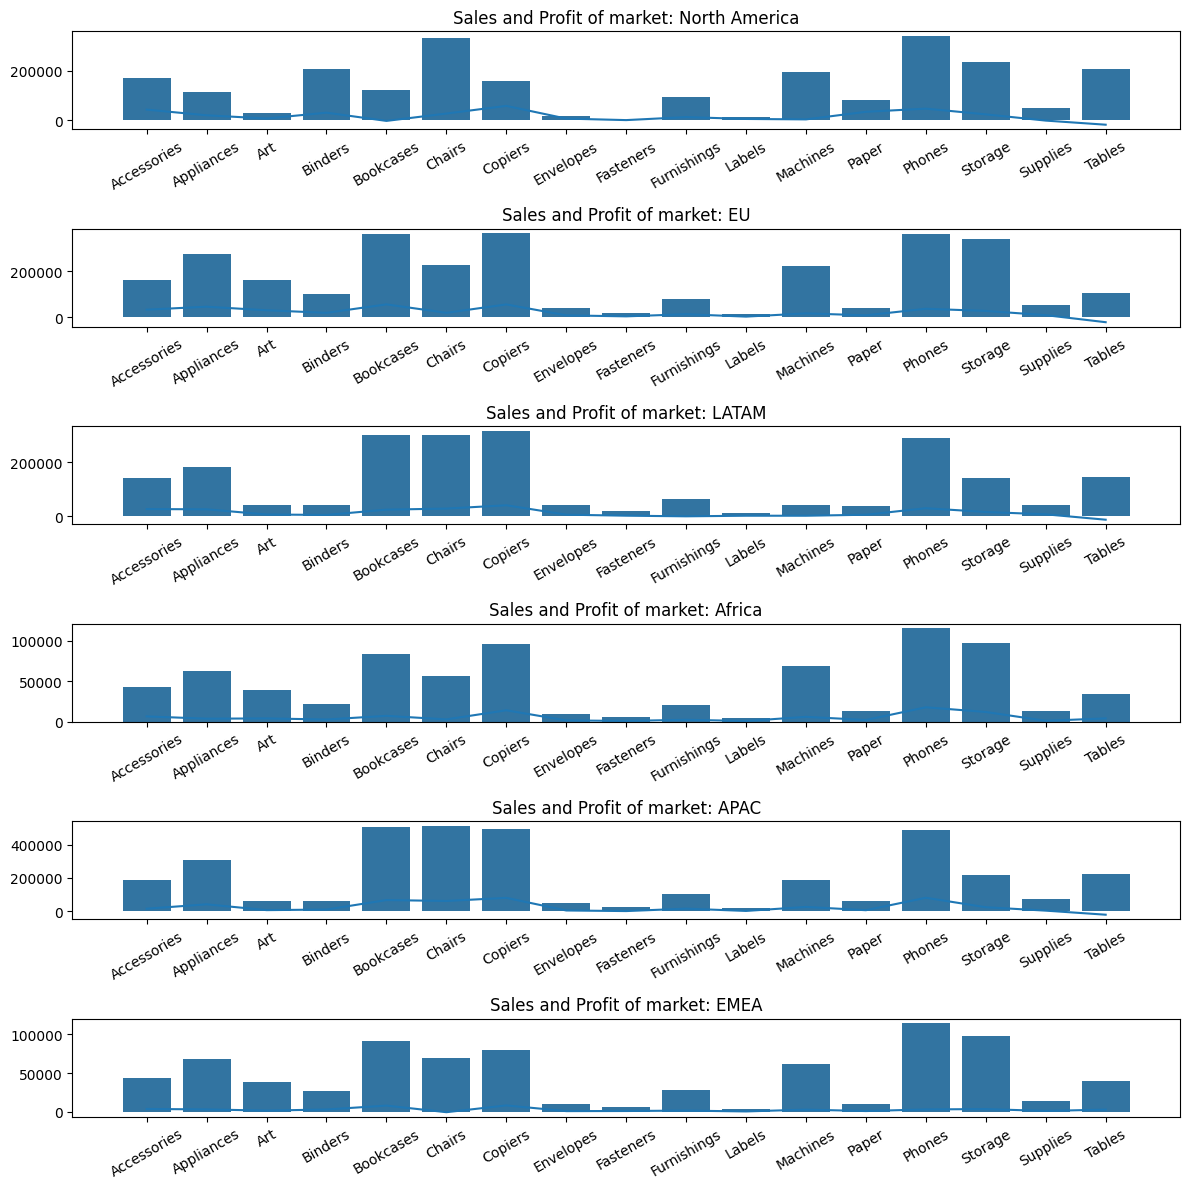

In [19]:
# 假设数据已经准备好
# data = pd.read_csv("your_data.csv")
fig, axes = plt.subplots(6, 1, figsize=(12, 12))
axes = axes.flatten()


for i, m in enumerate(data["Market2"].unique()):
    d = data[data["Market2"] == m]
    sales = d.groupby("Sub.Category")["Sales"].sum()
    profit = d.groupby("Sub.Category")["Profit"].sum()
    sns.barplot(
        x=sales.index.values,
        y=sales.values,
        ax=axes[i],
    )
    sns.lineplot(
        x=profit.index.values,
        y=profit.values,
        ax=axes[i],
    )
    axes[i].set_title(f"Profit ratio of market: {m}")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()

In [70]:
data[data["Country"] == "United Kingdom"]["State"].unique()
data[data["Country"] == "China"]["State"].unique()

array(['Guangdong', 'Jiangsu', 'Liaoning', 'Shanxi', 'Jiangxi', 'Hunan',
       'Shandong', 'Tianjin', 'Jilin', 'Chongqing', 'Fujian', 'Zhejiang',
       'Shanghai', 'Gansu', 'Henan', 'Heilongjiang', 'Sichuan', 'Hubei',
       'Inner Mongolia', 'Anhui', 'Guangxi', 'Hebei', 'Beijing',
       'Shaanxi', 'Yunnan', 'Qinghai', 'Hainan', 'Ningxia',
       'Xinjiang Uygur', 'Guizhou'], dtype=object)

## 数据理解和清洗总结

- 数据质量较好，未出现有缺失值和重复值
- 数据规模较大，易于观察出整体市场销售情况
- 维度较多能够发现维度之间的关系

# 数据分析

- 分成市场分析和用户分析两个部分
- 市场分析主要有
    1. 分析各个区域销售情况
    2. 分析各个商品在各个区域的销售情况
    3. 各商品各区域时间趋势分析
- 用户分析有
    1. 用户购买频率分析
    2. 不同区域用户
    3. RFM分析

In [56]:
# 得到对应优先级并且设置为categorical
cates = ["Low", "Medium", "High", "Critical"]
data["Order.NPriority"] = data["Order.Priority"].apply(lambda p: cates.index(p) + 1)
customer_impt = (
    data[["Customer.ID", "Order.NPriority", "RFM"]]
    .groupby("Customer.ID")
    .agg(
        RFM=pd.NamedAgg(column="RFM", aggfunc=lambda s: s.mode()),
        Priority=pd.NamedAgg(column="Order.NPriority", aggfunc="mean"),
    )
)
customer_impt.sort_values(by="Priority", ascending=False)
customer_impt.reset_index(drop=True).groupby("RFM").mean()

,Priority
RFM,
一般价值客户,2.427143
一般保持客户,2.414912
一般发展客户,2.463857
一般挽留客户,2.399348
重点保持客户,2.400283
重点发展客户,2.427618
重点挽留客户,2.413390
高价值客户,2.405497


# 区域销售情况分析

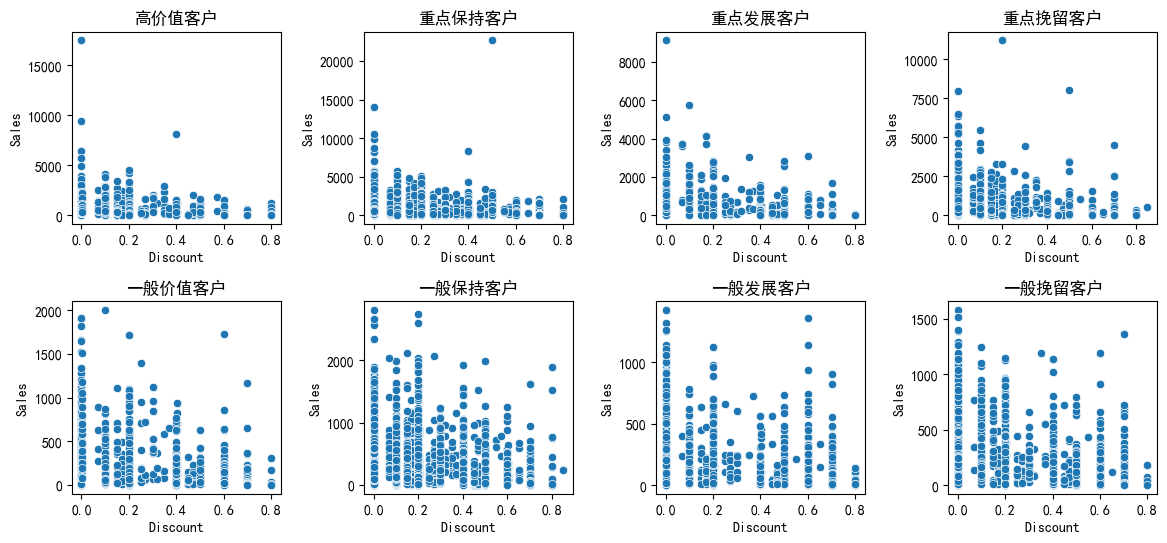

In [44]:
fig, axs = plt.subplots(2, 4, figsize=(14, 6))
axs = axs.flatten()

for i, name in enumerate(customer_segments.values()):
    sns.scatterplot(data=data[data["RFM"] == name][["Discount", "Sales"]], x="Discount", y="Sales", ax=axs[i])
    axs[i].set_title(name)

plt.subplots_adjust(hspace=0.4, wspace=0.4)

In [35]:
from pyecharts.charts import Bar, Tab
from pyecharts.options import ComponentTitleOpts
from pyecharts import options as opts


countries = data["Country"].unique()
tab = Tab()

# 为每个国家创建一个Bar图表
for country in countries:
    # 过滤数据
    filtered_data = data[data["Country"] == country][
        ["Category", "", "Profit", "Sales", "Quantity"]
    ]

    # 聚合数据
    agged_data = filtered_data.groupby("Category").agg(
        Profit=pd.NamedAgg(column="Profit", aggfunc="mean"),
        Sales=pd.NamedAgg(column="Sales", aggfunc="mean"),
        Quantity=pd.NamedAgg(column="Quantity", aggfunc="mean"),
    )

    # 创建柱状图
    bar = Bar()
    bar.add_yaxis("Profit", list(agged_data["Profit"]))
    bar.add_yaxis("Sales", list(agged_data["Sales"]))
    bar.add_yaxis("Quantity", list(agged_data["Quantity"])
    bar.add_xaxis(list(agged_data.index)))
    bar.set_global_opts(
        title_opts=opts.TitleOpts(title=f"Aggregated Data for {country}")
    )

    # 将图表添加到Tab中
    tab.add(bar, country)

# 生成HTML文件
tab.render("dynamic_page_with_tabs.html")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1101967661.py, line 26)

## RFM分析

In [8]:
# 先考察一共有多少客户
data["Customer.ID"].unique().shape

(4873,)

In [9]:
# 先拿到RFM分析需要的字段并且查看数据情况
rfm_df = data[["Customer.ID", "Order.Date", "Quantity", "Sales", "Profit"]]
rfm_df.describe(include=[np.int64, np.float64])

,Quantity,Sales,Profit
count,51290.000000,51290.000000,51290.000000
mean,3.476545,246.498440,28.610982
std,2.278766,487.567175,174.340972
min,1.000000,0.000000,-6599.978000
25%,2.000000,31.000000,0.000000
50%,3.000000,85.000000,9.240000
75%,5.000000,251.000000,36.810000
max,14.000000,22638.000000,8399.976000


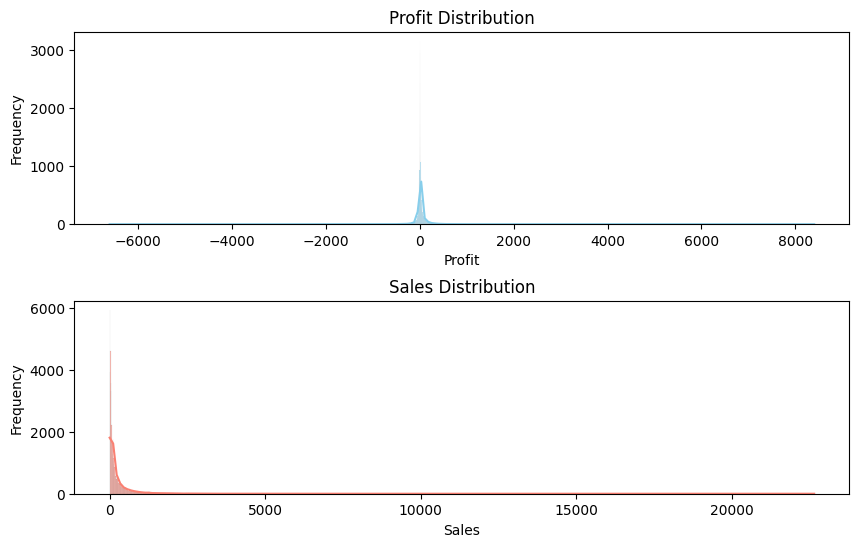

In [10]:
# Sales Profit存在极少数离群值
# 首先通过sns barplot看一下数据分布情况
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs = axs.flatten()

# 绘制Profit的分布
sns.histplot(rfm_df['Profit'], bins='auto', kde=True, color='skyblue', ax=axs[0])
axs[0].set_title('Profit Distribution')
axs[0].set_xlabel('Profit')
axs[0].set_ylabel('Frequency')

# 绘制Sales的分布
sns.histplot(rfm_df['Sales'], bins='auto', kde=True, color='salmon', ax=axs[1])
axs[1].set_title('Sales Distribution')
axs[1].set_xlabel('Sales')
axs[1].set_ylabel('Frequency')

plt.subplots_adjust(hspace=0.4)

In [11]:
# 计算指标 由于存在离群极值所以在计算整体判断指标的时候截断对应数据
upper_profit = 3000
lower_profit = -3000
# (rfm_df["Profit"] < -3000).value_counts()
rfm_df["Profit_clipped"] = np.clip(rfm_df['Profit'], lower_profit, upper_profit)
rfm_df["Profit_clipped"]

0         9.3312
1         9.2928
2         9.8418
3        53.2608
4         3.1104
          ...   
51285    22.5732
51286     3.1584
51287     4.2804
51288    33.9300
51289    51.8238
Name: Profit_clipped, Length: 51290, dtype: float64

In [12]:
upper_sales = 8000
# (rfm_df["Sales"] < 8000).value_counts()
rfm_df["Sales_clipped"] = np.clip(rfm_df['Sales'], 0, upper_sales)
rfm_df["Sales_clipped"]

0         19
1         19
2         21
3        111
4          6
        ... 
51285     69
51286      9
51287     12
51288     90
51289    154
Name: Sales_clipped, Length: 51290, dtype: int64

In [13]:
rfm_df["Order.Date"] = pd.to_datetime(rfm_df["Order.Date"])
datetime_now = rfm_df["Order.Date"].max()
datetime_now

Timestamp('2014-12-31 00:00:00')

In [14]:
# 1. 最近一次消费时间 （得到该数据集中最大的时间并作差）
# 2. 这几年的消费频次 （得到字段数）
# 3. 客户总消费金额 （得到）
_RFM = rfm_df.groupby("Customer.ID").agg(
    R = pd.NamedAgg("Order.Date", lambda x: (datetime_now - x.max()).total_seconds()),
    F = pd.NamedAgg("Order.Date", "count"),
    M = pd.NamedAgg("Sales_clipped", "mean")
)
_RFM

,R,F,M
Customer.ID,,,
AA-103151,691200.0,10,144.500000
AA-103152,1123200.0,16,381.562500
AA-103153,59961600.0,5,126.600000
AA-103154,15897600.0,11,505.909091
AA-103751,518400.0,9,267.444444
...,...,...,...
ZD-119252,34300800.0,9,215.222222
ZD-219251,1555200.0,10,188.900000
ZD-219252,86400.0,14,324.857143


In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
for i in "RFM":
    _RFM[i] = ss.fit_transform(_RFM[i].to_numpy().reshape(-1, 1))
    _RFM[i] = _RFM[i].apply(lambda x: int(x > 0))

_RFM

,R,F,M
Customer.ID,,,
AA-103151,0,0,0
AA-103152,0,1,1
AA-103153,1,0,0
AA-103154,0,1,1
AA-103751,0,0,1
...,...,...,...
ZD-119252,1,0,0
ZD-219251,0,0,0
ZD-219252,0,1,1


In [16]:
customer_segments = {
    "111": "高价值客户",
    "011": "重点保持客户",
    "101": "重点发展客户",
    "001": "重点挽留客户",
    "110": "一般价值客户",
    "010": "一般保持客户",
    "100": "一般发展客户",
    "000": "一般挽留客户",
}
_RFM["RFM"] = _RFM.apply(
    lambda r: customer_segments[f'{r["R"]}{r["F"]}{r["M"]}'], axis=1
)
_RFM

,R,F,M,RFM
Customer.ID,,,,
AA-103151,0,0,0,一般挽留客户
AA-103152,0,1,1,重点保持客户
AA-103153,1,0,0,一般发展客户
AA-103154,0,1,1,重点保持客户
AA-103751,0,0,1,重点挽留客户
...,...,...,...,...
ZD-119252,1,0,0,一般发展客户
ZD-219251,0,0,0,一般挽留客户
ZD-219252,0,1,1,重点保持客户


In [29]:
# 完成处理后将属性添加到data中
data["RFM"] = data["Customer.ID"].apply(lambda s: _RFM.loc[s, "RFM"])
data["Order.Date"] = pd.to_datetime(data["Order.Date"])
data.head

<bound method NDFrame.head of               Category         City        Country Customer.ID  \
0      Office Supplies  Los Angeles  United States   LS-172304   
1      Office Supplies  Los Angeles  United States   MV-174854   
2      Office Supplies  Los Angeles  United States   CS-121304   
3      Office Supplies  Los Angeles  United States   CS-121304   
4      Office Supplies  Los Angeles  United States   AP-109154   
...                ...          ...            ...         ...   
51285  Office Supplies  Los Angeles  United States   AM-103604   
51286  Office Supplies  Los Angeles  United States   AM-103604   
51287  Office Supplies  Los Angeles  United States   HR-147704   
51288  Office Supplies  Los Angeles  United States   RM-196754   
51289  Office Supplies  Los Angeles  United States   FH-143654   

          Customer.Name  Discount Market Order.Date        Order.ID  \
0      Lycoris Saunders       0.0     US 2011-01-07  CA-2011-130813   
1         Mark Van Huff       0.0  

In [18]:
tmp_df = data[["Country", "Customer.ID", "Profit", "Sales", "RFM"]]
tmp_df.sort_values(by=["Country"], ascending=False)
plt.rcParams['font.sans-serif'] = ['SimHei']
tmp_df[["Customer.ID", "RFM"]].drop_duplicates().RFM.value_counts()
# sns.barplot(data=tmp_df.RFM.value_counts())

RFM
一般挽留客户    997
重点保持客户    939
一般保持客户    879
一般发展客户    868
重点挽留客户    539
重点发展客户    321
高价值客户     169
一般价值客户    161
Name: count, dtype: int64

In [28]:
customer_df = data.groupby("Customer.ID").agg(
    mean_profit = pd.NamedAgg("Profit", "mean"),
    mean_sales = pd.NamedAgg("Sales", "mean"),
    RFM = pd.NamedAgg("RFM", lambda s: s.mode())
)
customer_df.to_csv("RFM_sales_profits")

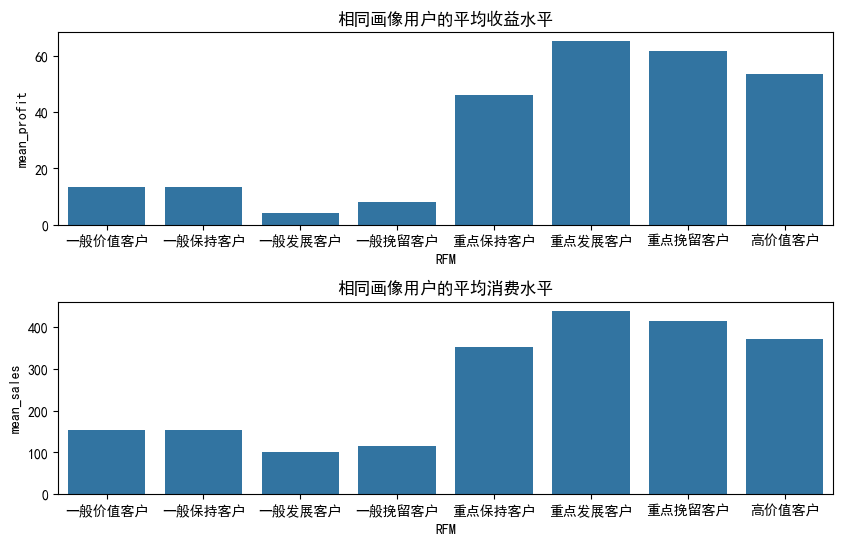

In [27]:
customer_df = customer_df.groupby("RFM").agg(
    mean_profit=pd.NamedAgg("mean_profit", "mean"),
    mean_sales=pd.NamedAgg("mean_sales", "mean"),
)
customer_df
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs = axs.flatten()

sns.barplot(
    x=customer_df.index,
    y=customer_df.mean_profit,
    ax=axs[0],
)
axs[0].set_title("相同画像用户的平均收益水平")
sns.barplot(
    x=customer_df.index,
    y=customer_df.mean_sales,
    ax=axs[1],
)
axs[1].set_title("相同画像用户的平均消费水平")

plt.subplots_adjust(hspace=0.4)